<a href="https://colab.research.google.com/github/salllwaaa/Conect-_x/blob/main/Startups1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing Libraries and reading data**

Import necessary Libraries

In [183]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
# Ignore warnings
warnings.filterwarnings('ignore')

read data

In [146]:
data=pd.read_csv("/content/Startups1.csv")

# **Data Exploring**

In [147]:
data.head()

,Unnamed: 0,Company,City,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors
0,0,Urban Company,Gurgaon,2014,1001-5000,445920356,12,16
1,1,Classplus,Noida,2018,101-250,89506451,10,20
2,2,Paytm,Noida,2010,501-1000,32448851,4,4
3,3,Apna,Mumbai,2019,101-250,93450000,4,6
4,4,Razorpay,Bengaluru,2014,1001-5000,366600000,7,29


In [148]:
data.shape

(300, 8)

# **About Dataset**

Content The following dataset has data about the Top 300 startups in India. Details about the columns are as follows:

->Company - Name of the Startup.

->City - The City in which the startup is started.

->Starting Year - The Year in which the startup was started.

->No. of Employees - Number of employees in the startup.

->Funding Amount in $ - Total funding amount funded to the startup.

->Funding Rounds - Funding rounds are the number of times a startup goes back to the market to raise more capital. The goal of every round is for founders to trade equity in their business for the capital they can utilize to advance their companies to the next level.

->No. of Investors - Number of investors in the startup.

# **Data Preprocessing**

In [149]:
data.isnull().sum()

Unnamed: 0             0
Company                0
City                   0
Starting Year          0
No. of Employees       0
Funding Amount in $    0
Funding Round          0
No. of Investors       0
dtype: int64

In [150]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           300 non-null    int64 
 1   Company              300 non-null    object
 2   City                 300 non-null    object
 3   Starting Year        300 non-null    int64 
 4   No. of Employees     300 non-null    object
 5   Funding Amount in $  300 non-null    int64 
 6   Funding Round        300 non-null    int64 
 7   No. of Investors     300 non-null    int64 
dtypes: int64(5), object(3)
memory usage: 18.9+ KB


In [151]:
# checking duplicates
data.duplicated().sum()

0

In [152]:
# Drop the 'index' column
data=data.iloc[:,1:]

In [153]:
data.nunique()

Company                300
City                    24
Starting Year           26
No. of Employees        10
Funding Amount in $    293
Funding Round           24
No. of Investors        37
dtype: int64

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Company              300 non-null    object
 1   City                 300 non-null    object
 2   Starting Year        300 non-null    int64 
 3   No. of Employees     300 non-null    object
 4   Funding Amount in $  300 non-null    int64 
 5   Funding Round        300 non-null    int64 
 6   No. of Investors     300 non-null    int64 
dtypes: int64(4), object(3)
memory usage: 16.5+ KB


In [155]:
data["Company"].unique()

array(['Urban Company', 'Classplus', 'Paytm', 'Apna', 'Razorpay',
       'UpGrad', 'Delhivery', '1mg', 'BigBasket', 'GoMechanic',
       'Unacademy', 'Ola', 'Licious', 'CRED', 'CityMall', 'Pine Labs',
       'Dodla Dairy', 'Groww', 'Grofers', 'Jumbotail', 'slice', 'InMobi',
       'Dunzo', 'BYJU’S', 'Cashfree', 'MediBuddy', 'Progcap',
       'Capital Float', 'CARS24', 'Bharat Biotech', 'Skillmatics',
       'Rapido', 'Reliance Jio', 'YourStory', 'Kodo', 'Practo',
       'NiYO Solutions', 'Reliance Retail', 'Locus.sh', 'KreditBee',
       'boAt', 'Flipkart', 'MobiKwik', 'Cuemath', 'Jai Kisan',
       'Infra.Market', 'Xpressbees', 'Northern Arc', 'Toppr', 'MyGlamm',
       'ZoomCar', 'Snapdeal', 'WhiteHat Education Technology', 'CarDekho',
       'Koo App', 'Porter', 'Skyroot Aerospace', 'Holisol logistics',
       'Exotel', 'CarTrade', 'OPEN', 'InCred', 'Pepperfry', 'Shadowfax',
       'The Man Company', 'Agnikul', 'Shop101', 'Plum', 'Pee Safe',
       'cure.fit', 'Nykaa', 'NoBroker', '

In [156]:
value_counts = Counter(data["Company"].unique())

# Display the counts
for value, count in value_counts.items():
    print(f"{value}: {count}")

Urban Company: 1
Classplus: 1
Paytm: 1
Apna: 1
Razorpay: 1
UpGrad: 1
Delhivery: 1
1mg: 1
BigBasket: 1
GoMechanic: 1
Unacademy: 1
Ola: 1
Licious: 1
CRED: 1
CityMall: 1
Pine Labs: 1
Dodla Dairy: 1
Groww: 1
Grofers: 1
Jumbotail: 1
slice: 1
InMobi: 1
Dunzo: 1
BYJU’S: 1
Cashfree: 1
MediBuddy: 1
Progcap: 1
Capital Float: 1
CARS24: 1
Bharat Biotech: 1
Skillmatics: 1
Rapido: 1
Reliance Jio: 1
YourStory: 1
Kodo: 1
Practo: 1
NiYO Solutions: 1
Reliance Retail: 1
Locus.sh: 1
KreditBee: 1
boAt: 1
Flipkart: 1
MobiKwik: 1
Cuemath: 1
Jai Kisan: 1
Infra.Market: 1
Xpressbees: 1
Northern Arc: 1
Toppr: 1
MyGlamm: 1
ZoomCar: 1
Snapdeal: 1
WhiteHat Education Technology: 1
CarDekho: 1
Koo App: 1
Porter: 1
Skyroot Aerospace: 1
Holisol logistics: 1
Exotel: 1
CarTrade: 1
OPEN: 1
InCred: 1
Pepperfry: 1
Shadowfax: 1
The Man Company: 1
Agnikul: 1
Shop101: 1
Plum: 1
Pee Safe: 1
cure.fit: 1
Nykaa: 1
NoBroker: 1
PharmEasy: 1
OfBusiness: 1
LEAD School: 1
Upstox: 1
Teachmint: 1
ZestMoney: 1
Convosight: 1
Livspace: 1
Re

In [157]:
le = LabelEncoder()
data['Company_Label'] = le.fit_transform(data['Company'])

In [158]:
data["Company_Label"].unique()

array([265,  45, 184,   5, 215, 263,  57,   0,  18,  95, 261, 179, 140,
        31,  44, 194,  61,  99,  98, 124, 297, 115,  65,  13,  35, 154,
       205,  32,  30,  16, 239, 213, 218, 285, 129, 202, 169, 219, 146,
       131, 292,  82, 159,  54, 122, 117, 283, 172, 254, 163, 291, 242,
       277,  33, 130, 201, 240, 106,  70,  34, 174, 114, 189, 229, 253,
         1, 233, 198, 187, 293, 173, 171, 192, 177, 132, 264, 251, 287,
        49, 143, 217, 243, 249,  56, 151, 281, 149,   7, 256,  48, 284,
       150, 158,  21, 266, 182, 186, 178, 207, 164,  23, 274,  87, 109,
        62, 298, 118, 290, 224, 278,  41,  79,  58,  12, 222, 188,  92,
        73,  76, 295, 155, 137,  42, 259,  67,  17, 272, 231, 135,  75,
       210, 211, 245, 204, 199,  26,  38,  64, 197, 134, 271,  60,  88,
       248,  27, 255,  15, 123, 296, 116, 200, 247, 244, 103, 209, 190,
       216, 105, 160, 270,  20, 168, 282, 180,   2,  28,  68,  11, 294,
       236,  40,   8,  83,  94, 107, 280, 139,  59, 220, 223, 28

In [159]:
data["City"].unique()

array(['Gurgaon', 'Noida', 'Mumbai', 'Bengaluru', 'Kormangala',
       'Hyderabad', 'New Delhi', 'Thane', 'Pune', 'Chennai', 'Andheri',
       'Delhi', 'Patna City', 'Haryana', 'Faridabad', 'Ahmedabad',
       'Surat', 'Kolkata', 'Sohna', 'Whitefield', 'Kilpauk', 'Azadpur',
       'Nungambakkam', 'Jaipur'], dtype=object)

In [160]:
data['City_Label'] = le.fit_transform(data['City'])

In [161]:
data["City_Label"].unique()

array([ 7, 16, 14,  3, 13,  9, 15, 22, 19,  4,  1,  5, 18,  8,  6,  0, 21,
       12, 20, 23, 11,  2, 17, 10])

In [162]:
data["No. of Employees"].unique()

array(['1001-5000', '101-250', '501-1000', '5001-10000', 'Nov-50',
       '251-500', '10001+', '51-100', '1-Oct', 'Not Available'],
      dtype=object)

In [163]:
count_not_available = data[data['No. of Employees'] == 'Not Available'].shape[0]

print("Number of rows with 'Not Available':", count_not_available)

Number of rows with 'Not Available': 1


In [164]:
#droping this is row because it appears once
data.drop(data[data['No. of Employees'] == 'Not Available'].index, inplace=True)

In [165]:
data['No. of Employees'].replace({
    '1001-5000': 3000,
    'Nov-50': 50,
    '1-Oct': 1,
    '101-250':175,
    '501-1000':750,
    '5001-10000':7500,
    '251-500':375,
    '10001+':10000,
    '51-100':75
}, inplace=True)

In [166]:
data["No. of Employees"].unique()

array([ 3000,   175,   750,  7500,    50,   375, 10000,    75,     1])

In [167]:
data = data.drop(["City", "Company"], axis=1)

In [168]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Starting Year        299 non-null    int64
 1   No. of Employees     299 non-null    int64
 2   Funding Amount in $  299 non-null    int64
 3   Funding Round        299 non-null    int64
 4   No. of Investors     299 non-null    int64
 5   Company_Label        299 non-null    int64
 6   City_Label           299 non-null    int64
dtypes: int64(7)
memory usage: 18.7 KB


In [169]:
#Looking more through the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Starting Year,299.0,2.013385e+03,5.145784e+00,1984.0,2012.0,2015.0,2016.0,2.020000e+03
No. of Employees,299.0,1.240421e+03,2.327511e+03,1.0,75.0,175.0,750.0,1.000000e+04
Funding Amount in $,299.0,3.159186e+08,1.631430e+09,42000.0,14420151.0,41255467.0,132295873.5,2.476762e+10
Funding Round,299.0,6.006689e+00,4.232341e+00,1.0,3.0,5.0,7.0,2.500000e+01
No. of Investors,299.0,1.058528e+01,7.517893e+00,0.0,5.0,9.0,14.0,4.500000e+01
Company_Label,299.0,1.490870e+02,8.659618e+01,0.0,74.5,149.0,223.5,2.990000e+02
City_Label,299.0,7.986622e+00,5.518105e+00,0.0,3.0,7.0,14.0,2.300000e+01


In [176]:
data.head()

,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Company_Label,City_Label
0,2014,1762.5,3.091095e+08,12,16.0,265,7
1,2018,175.0,8.950645e+07,10,20.0,45,16
2,2010,750.0,3.244885e+07,4,4.0,184,16
3,2019,175.0,9.345000e+07,4,6.0,5,14
4,2014,1762.5,3.091095e+08,7,27.5,215,3


# **Data Visualization**

**Check Outliers**

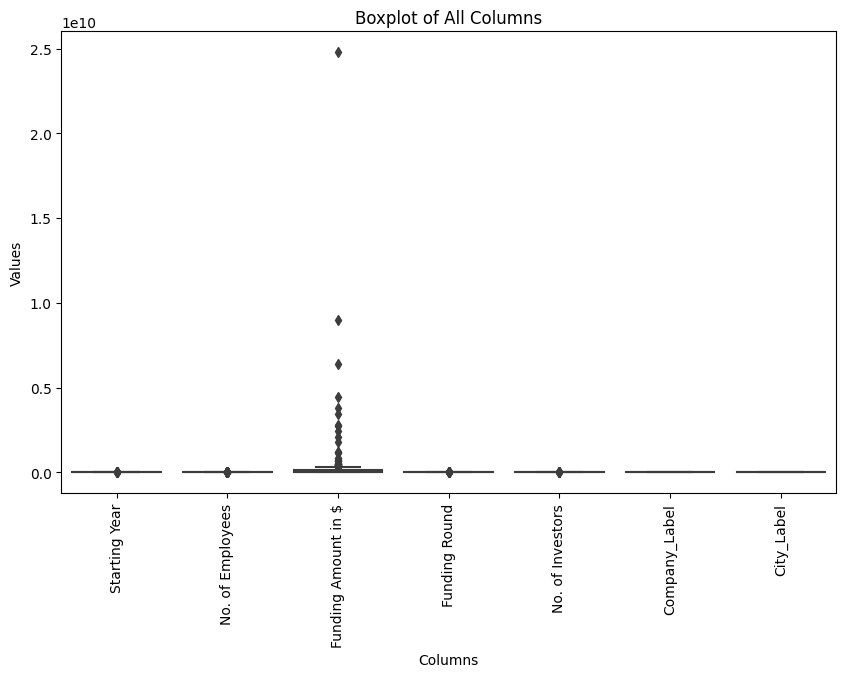

In [170]:
# Combine all the column data into a single column
df_combined = pd.melt(data)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_combined)

# Customize the plot
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of All Columns')
plt.xticks(rotation=90)

# Show the plot
plt.show()




**We can see we have outliers in:**

Funding Amount in $


In [171]:
#function to replace outliers with the max value possible without missing the data :)
def outliers(dataset,col):
  Q1 = dataset[col].quantile(0.25)
  Q3 = dataset[col].quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3+1.5*IQR

  for i in range(len(dataset)):
      if dataset[col].iloc[i] > upper_bound:
          dataset[col].iloc[i] = upper_bound
      if dataset[col].iloc[i] < lower_bound:
          dataset[col].iloc[i] = lower_bound

In [172]:
#replacing the outliers using the function
num_col = (data.columns).to_list()
for col in num_col:
  outliers(data, col)

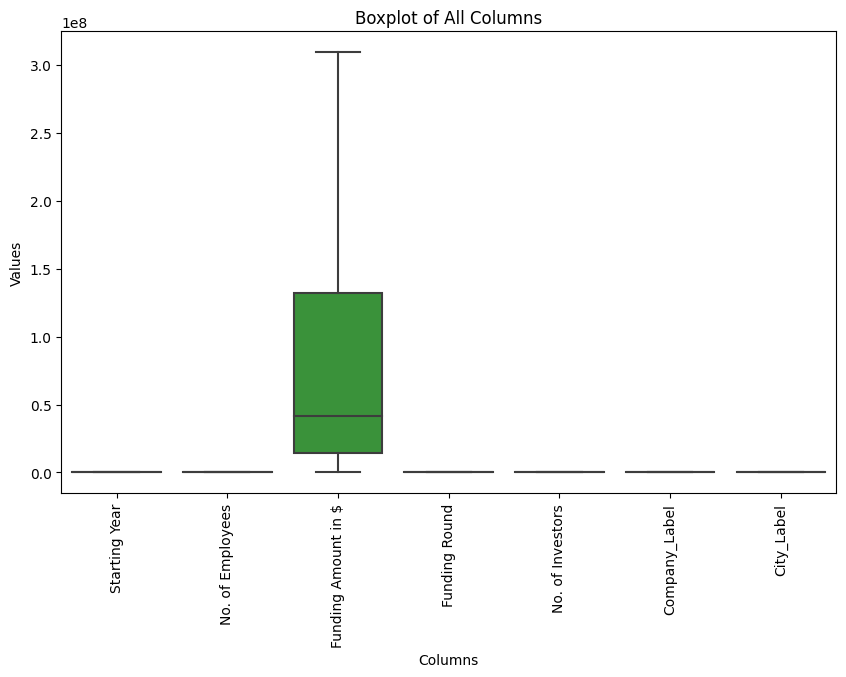

In [173]:
# Combine all the column data into a single column
df_combined = pd.melt(data)

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=df_combined)

# Customize the plot
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplot of All Columns')
plt.xticks(rotation=90)

# Show the plot
plt.show()

**Look at data distribution**

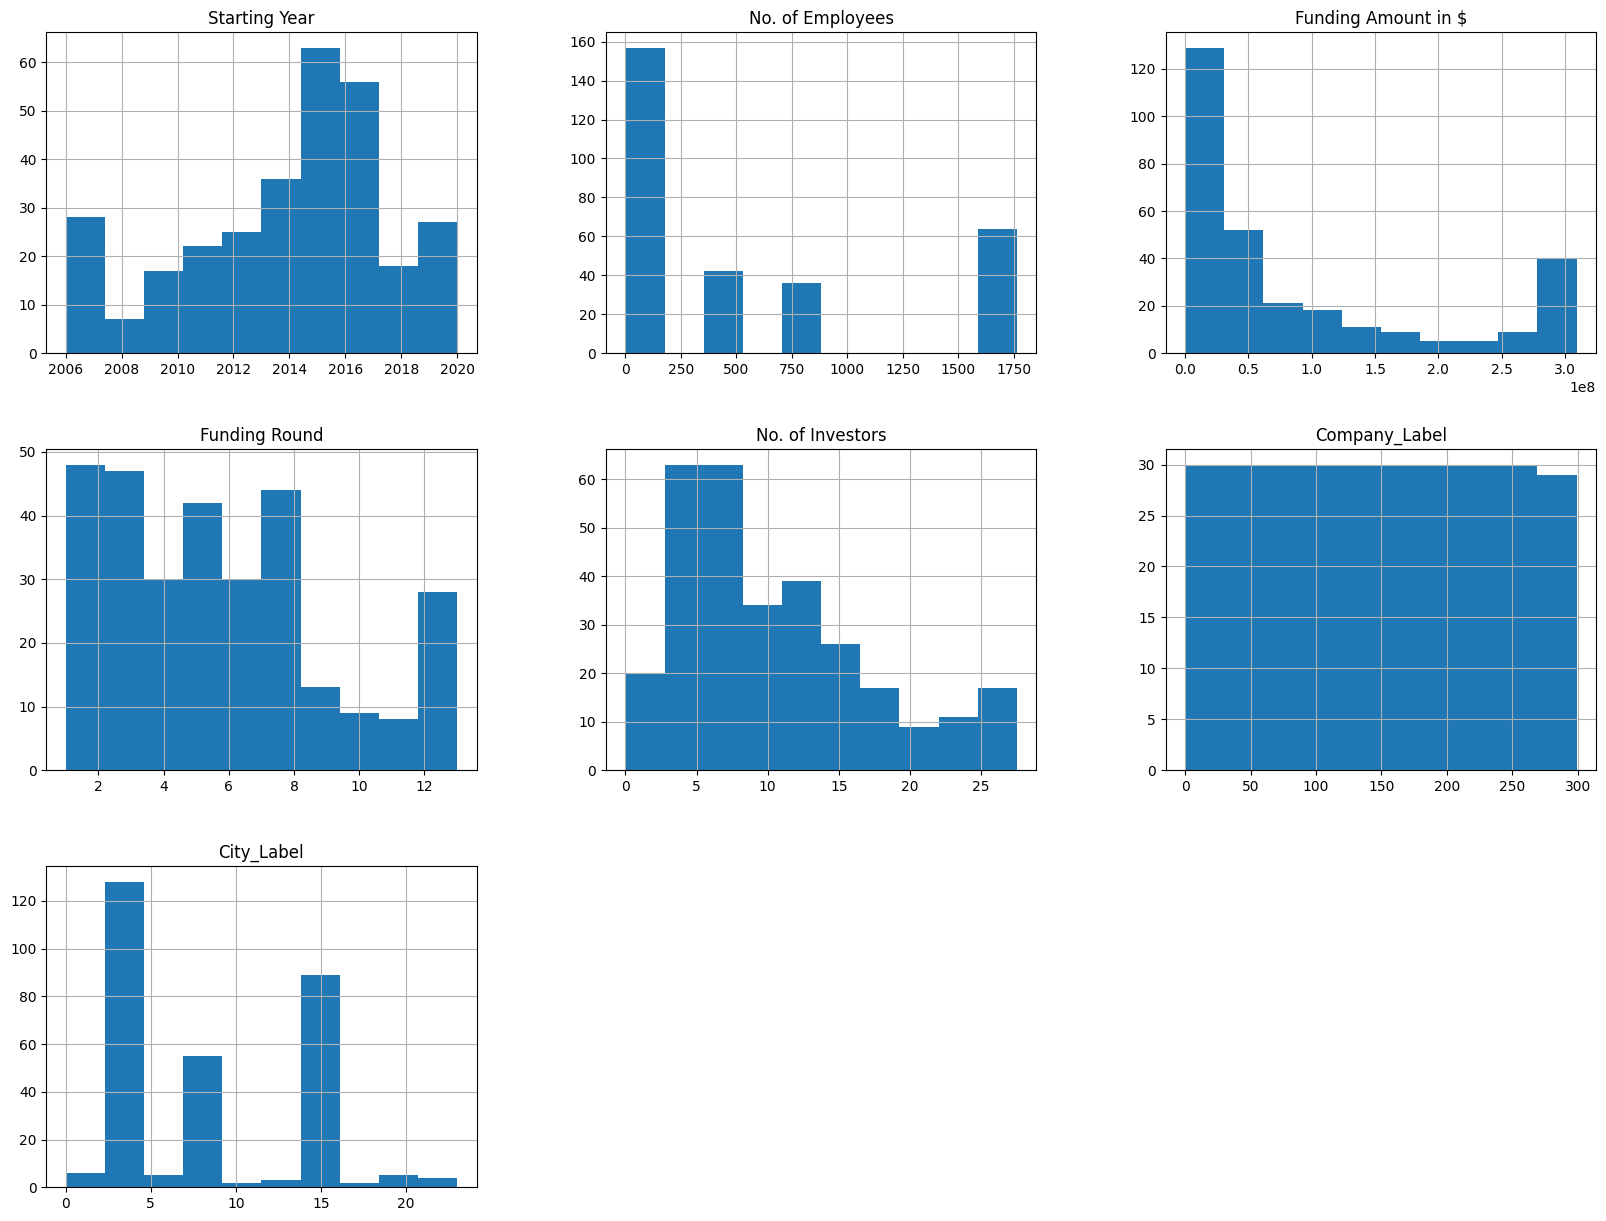

<Figure size 640x480 with 0 Axes>

In [174]:
data.hist(figsize= [20,15])
plt.show()
plt.tight_layout()

**Scaling Data**

In [178]:
scaler=StandardScaler()
data_SCALED=data.copy()
for col in data_SCALED:
  data_SCALED[col]=scaler.fit_transform(data[[col]])

In [180]:
data_SCALED.head()

,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Company_Label,City_Label
0,0.041106,1.811649,2.060147,1.876830,0.829174,1.340791,-0.179097
1,1.133600,-0.608610,-0.020389,1.280789,1.417017,-1.203996,1.454632
2,-1.051389,0.268019,-0.560958,-0.507332,-0.934356,0.403847,1.454632
3,1.406724,-0.608610,0.016972,-0.507332,-0.640435,-1.666684,1.091581
4,0.041106,1.811649,2.060147,0.386729,2.519223,0.762430,-0.905199


# **Try K_means and DBSCAN Models**

**kmeans**

Figuring out how many clusters will we be having

In [181]:
K=range(2,16)
WCSS = []
for k in K:
    kmeans= KMeans(n_clusters=k)
    kmeans=kmeans.fit(data_SCALED)
    WCSS_iter = kmeans.inertia_
    WCSS.append(WCSS_iter)

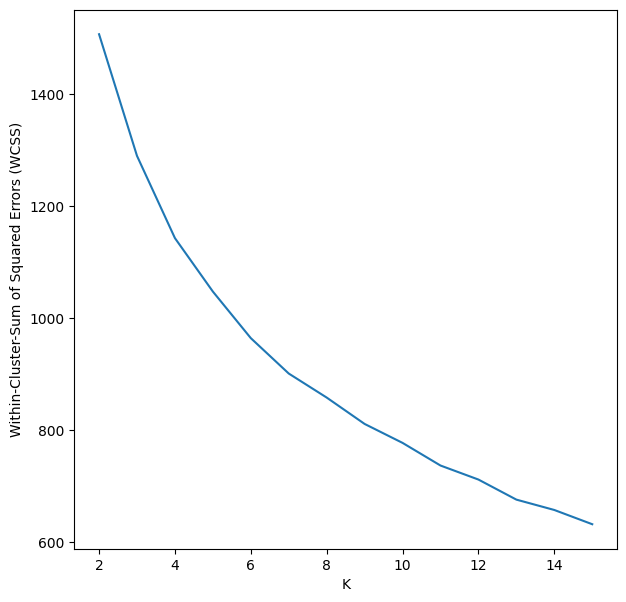

In [182]:
#ploting to see how many clusters will we have
plt.figure(figsize=(7,7))
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WCSS)')
plt.plot(K,WCSS)

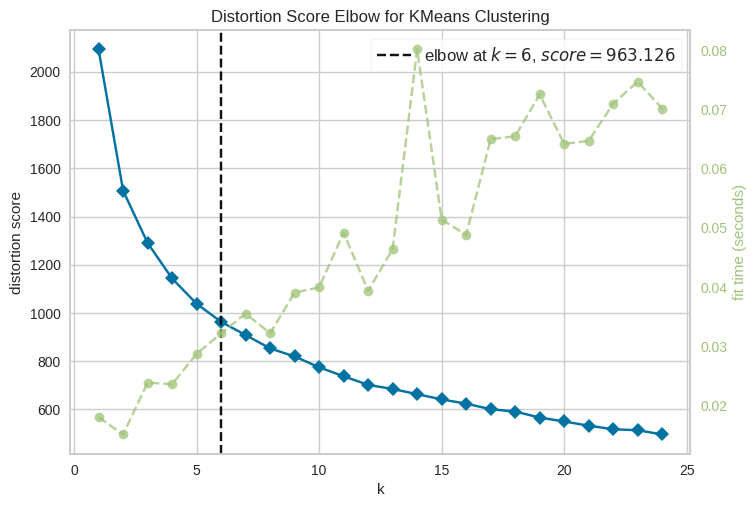

In [184]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,25))
visualizer.fit(data_SCALED)
visualizer.poof()
plt.show()

**From that we could conclude that the 6 clusters will perform well**

Getting the clusters

In [185]:
kmeans = KMeans(n_clusters=6, init='random', max_iter=300,random_state=0)
PredictedClusters= kmeans.fit_predict(data_SCALED)
PredictedClusters

array([0, 2, 5, 1, 0, 4, 0, 2, 0, 2, 0, 0, 0, 2, 1, 0, 4, 2, 0, 2, 2, 4,
       0, 0, 1, 4, 5, 2, 0, 4, 5, 0, 0, 3, 5, 0, 3, 4, 2, 3, 5, 0, 0, 4,
       5, 5, 0, 0, 0, 5, 0, 0, 3, 4, 1, 4, 3, 5, 1, 4, 3, 0, 4, 2, 3, 1,
       5, 2, 2, 0, 0, 2, 0, 2, 5, 5, 3, 2, 1, 0, 0, 3, 5, 5, 3, 3, 2, 1,
       2, 1, 3, 3, 2, 1, 2, 3, 5, 3, 2, 4, 0, 3, 2, 0, 1, 3, 2, 0, 4, 5,
       1, 1, 4, 0, 0, 5, 5, 5, 1, 3, 4, 0, 1, 5, 4, 2, 3, 5, 3, 1, 0, 3,
       5, 3, 5, 1, 1, 1, 3, 4, 3, 1, 2, 0, 5, 2, 1, 4, 5, 2, 4, 5, 4, 2,
       5, 3, 0, 4, 4, 3, 1, 4, 5, 0, 1, 4, 5, 1, 4, 2, 4, 1, 5, 1, 2, 4,
       2, 1, 2, 4, 2, 0, 5, 5, 4, 5, 4, 1, 3, 5, 0, 1, 2, 4, 1, 2, 5, 3,
       3, 1, 1, 5, 1, 3, 5, 2, 1, 1, 5, 4, 1, 3, 2, 5, 5, 3, 3, 2, 3, 3,
       3, 5, 3, 4, 1, 3, 1, 4, 4, 4, 2, 5, 3, 1, 3, 3, 4, 5, 2, 0, 3, 4,
       3, 3, 0, 3, 5, 5, 4, 1, 3, 5, 5, 5, 1, 4, 3, 5, 1, 5, 1, 1, 5, 4,
       1, 3, 5, 2, 2, 3, 5, 4, 5, 3, 1, 5, 5, 5, 5, 3, 4, 4, 5, 4, 5, 4,
       1, 5, 5, 4, 0, 0, 0, 3, 5, 5, 1, 5, 1], dtyp

In [186]:
data["Cluster"]=PredictedClusters
data.head()

,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Company_Label,City_Label,Cluster
0,2014,1762.5,3.091095e+08,12,16.0,265,7,0
1,2018,175.0,8.950645e+07,10,20.0,45,16,2
2,2010,750.0,3.244885e+07,4,4.0,184,16,5
3,2019,175.0,9.345000e+07,4,6.0,5,14,1
4,2014,1762.5,3.091095e+08,7,27.5,215,3,0


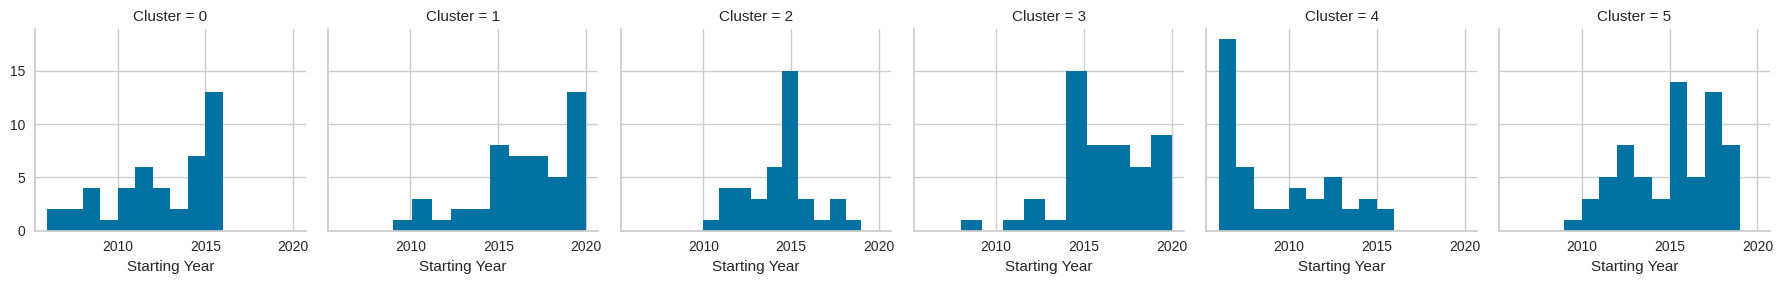

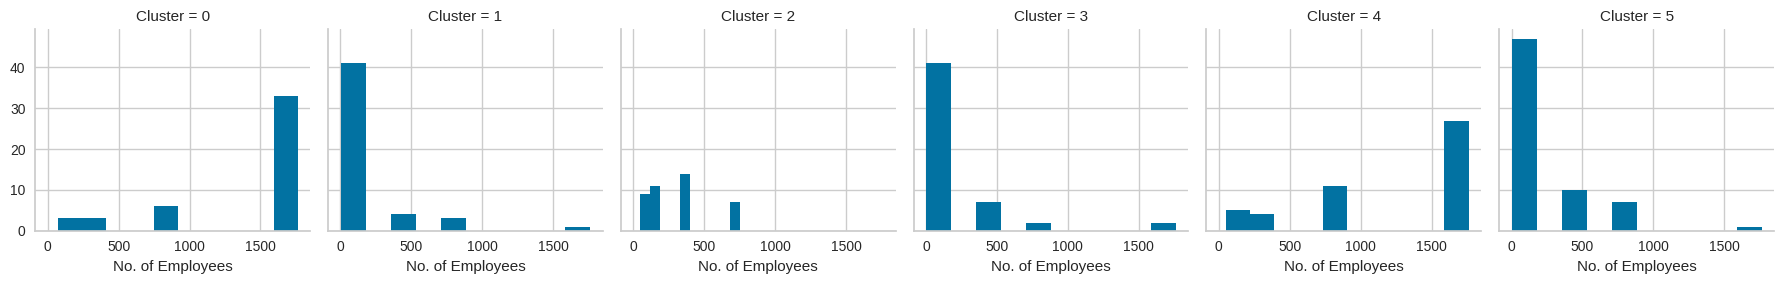

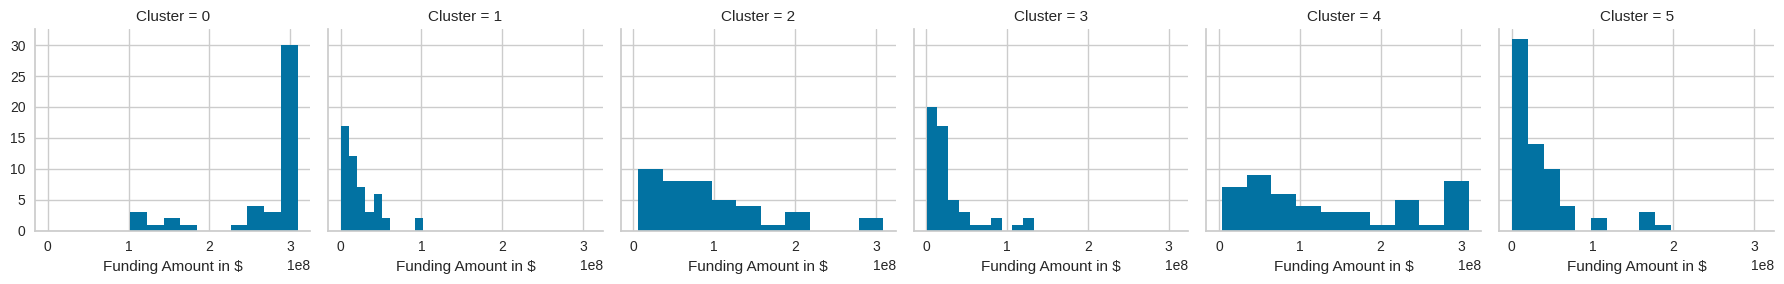

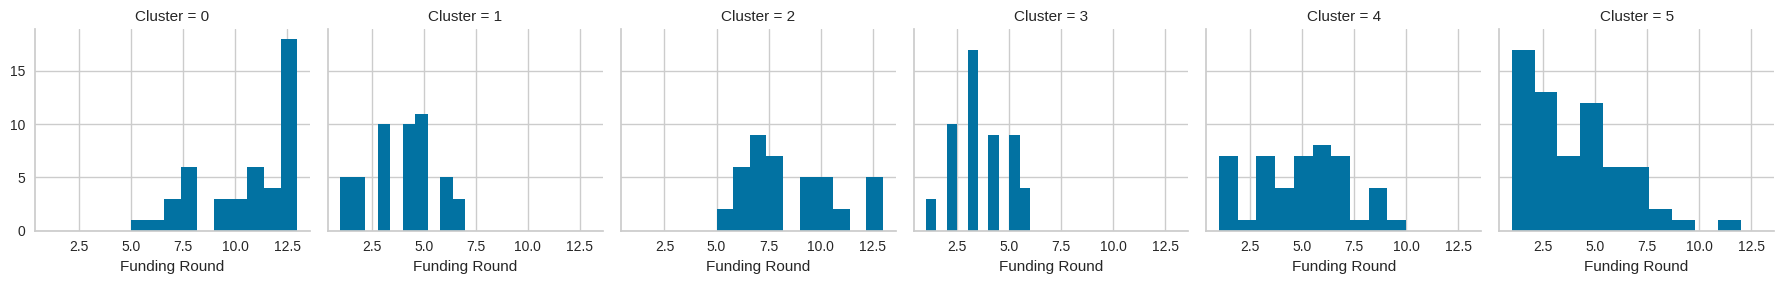

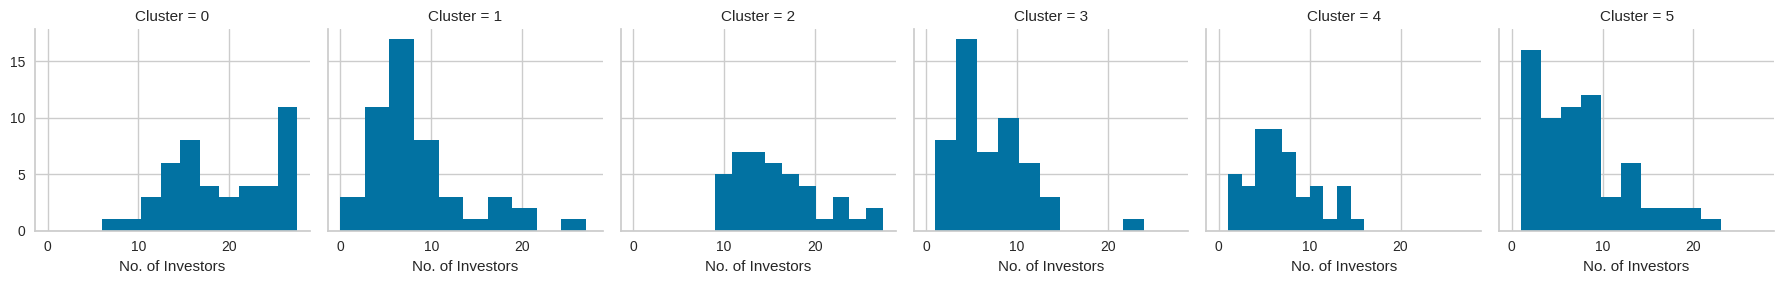

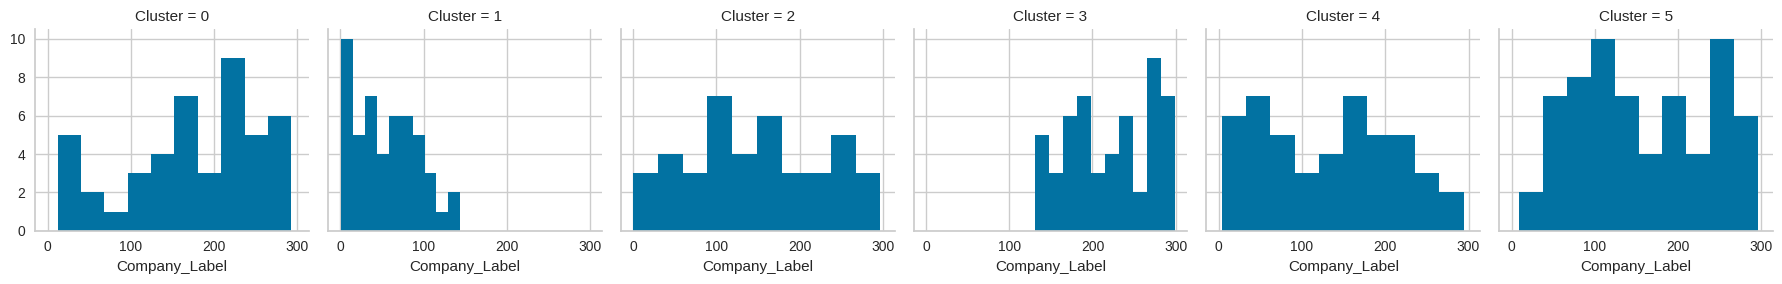

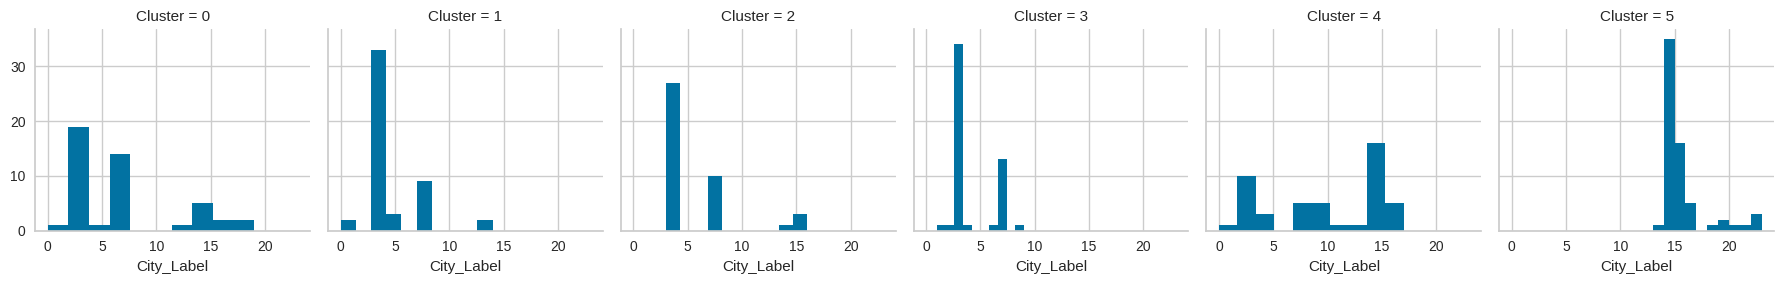

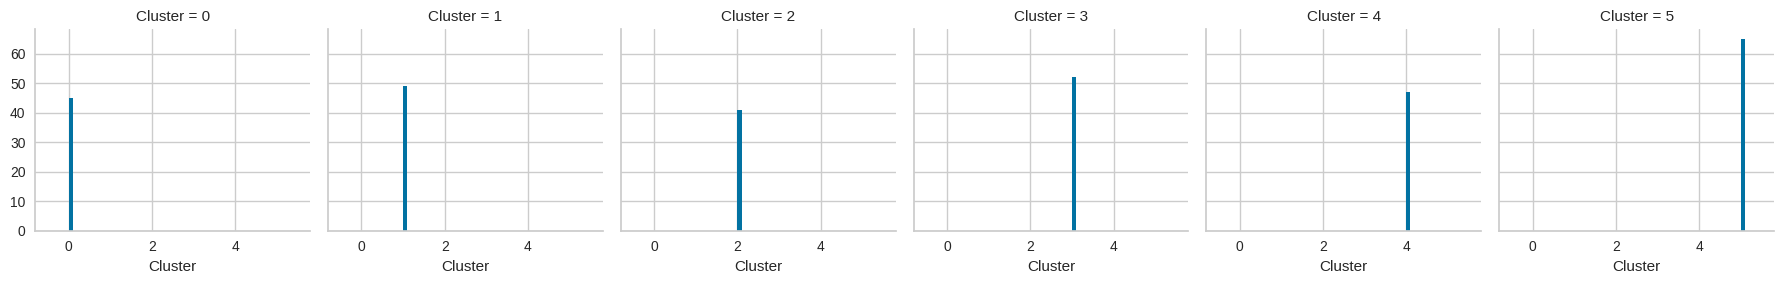

In [197]:
for c in data:
    grid= sns.FacetGrid(data , col='Cluster')
    grid.map(plt.hist, c)

**We can conclude many useful insights from the graphs above**


1. Cluster 0: in starting year 2015 mainly num of employees is about 1700,funding amounts was about 3.091095e+08, funding round was 12.5,num of inventors was between 10 to 12 ,this for comapnies takes labels 160 and 220 ,and cities 2 and 15


2. Cluster 1: in starting year 2020 mainly num of employees is about 300,funding amounts was about 0.2le8, funding round was 2.5 to 5,num of inventors was between 9 ,this for comapnies takes labels 10,and cities 3

3. Cluster 2:in starting year 2015 mainly num of employees is about 1700,funding amounts was about 100000 to 10000000, funding round was 6,num of inventors was between 10 to 20 ,this for comapnies takes labels 100 and 160 ,and cities 4

4. Cluster 3: in starting year 2015 mainly num of employees is about 100,funding amounts was about 0.1le8, funding round was 3.5,num of inventors was between 9 ,this for comapnies takes labels 130 and 270 ,and cities 3 and 7

5. Cluster 4:in starting year 2005 mainly num of employees is about 1700,funding amounts was about 0.3le8, funding round was 6,num of inventors was between 8 to 9 ,this for comapnies takes labels 160 and 60 ,and cities  15

6. Cluster 5:in starting year 2015 ,2017 mainly num of employees is about 100,funding amounts was about 0.1le8, funding round was 2 and 2.5,num of inventors was between 2 to 9 ,this for comapnies takes labels 100 and 270 ,and cities 15

**DBSCAN**

**we need the data back without the clusters**

In [188]:
data.drop(['Cluster'],axis=1,inplace=True)

In [189]:
data.head()

,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Company_Label,City_Label
0,2014,1762.5,3.091095e+08,12,16.0,265,7
1,2018,175.0,8.950645e+07,10,20.0,45,16
2,2010,750.0,3.244885e+07,4,4.0,184,16
3,2019,175.0,9.345000e+07,4,6.0,5,14
4,2014,1762.5,3.091095e+08,7,27.5,215,3


In [190]:
data_SCALED.head()

,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Company_Label,City_Label
0,0.041106,1.811649,2.060147,1.876830,0.829174,1.340791,-0.179097
1,1.133600,-0.608610,-0.020389,1.280789,1.417017,-1.203996,1.454632
2,-1.051389,0.268019,-0.560958,-0.507332,-0.934356,0.403847,1.454632
3,1.406724,-0.608610,0.016972,-0.507332,-0.640435,-1.666684,1.091581
4,0.041106,1.811649,2.060147,0.386729,2.519223,0.762430,-0.905199


In [191]:
#Applying DBSCAN
dbscan = DBSCAN(eps = 8, min_samples = 5).fit(data_SCALED) # fitting the model
labels = dbscan.labels_ # getting the labels
data['clusters']=labels

In [192]:
#Checking how many clusters are there.
data["clusters"].value_counts()

0    299
Name: clusters, dtype: int64

**So the model grouped all the data into a single cluster but why ??**

As the data was close to each other and dbscan works by the term of density thats why dbscan won't be a good choice to cluster this data and kmeans would and thats why it considered it all as one cluster .

# **Final Outcome with kmeans**

we will get the data back as it was with kmeans

In [193]:
data.head()

,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Company_Label,City_Label,clusters
0,2014,1762.5,3.091095e+08,12,16.0,265,7,0
1,2018,175.0,8.950645e+07,10,20.0,45,16,0
2,2010,750.0,3.244885e+07,4,4.0,184,16,0
3,2019,175.0,9.345000e+07,4,6.0,5,14,0
4,2014,1762.5,3.091095e+08,7,27.5,215,3,0


In [194]:
#dropping the clusters of dbscan
data.drop(['clusters'],axis=1,inplace=True)

In [195]:
#adding kmeans clusters
data["Cluster"]=PredictedClusters

In [196]:
#final review for the dataset
data.head()

,Starting Year,No. of Employees,Funding Amount in $,Funding Round,No. of Investors,Company_Label,City_Label,Cluster
0,2014,1762.5,3.091095e+08,12,16.0,265,7,0
1,2018,175.0,8.950645e+07,10,20.0,45,16,2
2,2010,750.0,3.244885e+07,4,4.0,184,16,5
3,2019,175.0,9.345000e+07,4,6.0,5,14,1
4,2014,1762.5,3.091095e+08,7,27.5,215,3,0
